In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import gudhi


import iblofunmatch.inter as ibfm

from datetime import datetime

_tol = 1e-10

output_dir = "output" # Name of directory to communicate with C++ program
data_dir = os.path.join("datasets")
plots_dir = os.path.join("plots")
os.makedirs(output_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

EXECUTABLE_PATH: /home/atorras/Documents/IBloFunMatch/build/IBloFunMatch


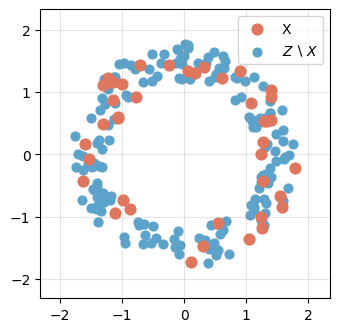

In [2]:
RandGen = np.random.default_rng(5)
num_points = 200
Z = ibfm.sampled_circle(1.2,1.8,num_points, RandGen)
indices_subset = list(range(int(num_points*0.2)))
fig, ax = plt.subplots(ncols=1, figsize=(3.5,3.5))
ibfm.plot_Vietoris_Rips_subset(Z, indices_subset, 0, ax)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "points_2.png"))

In [3]:
# Save dataset 
np.savetxt(os.path.join(data_dir, "Z-computation"), Z)
np.savetxt(os.path.join(data_dir, "indices-subset-computation"), indices_subset) 

In [4]:
before = datetime.now()
matching_data = ibfm.get_IBloFunMatch_subset(None, Z, indices_subset, output_dir, num_it=1, max_rad=-1, points=True)
after = datetime.now()
print(f"Took {(after-before).total_seconds()} seconds")

Took 0.209079 seconds


Figure for depicting a cycle representative, its projection and matched cycle (with edge collapses)

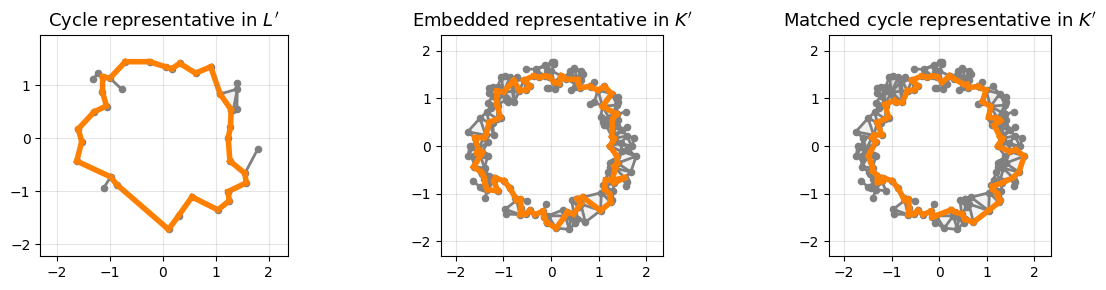

In [5]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
filt_val = 1.3
ibfm.plot_Vietoris_Rips(Z[indices_subset], filt_val, ax[0], labels=False, fontsize=15, color="gray")
ibfm.plot_Vietoris_Rips(Z, filt_val, ax[1], labels=False, fontsize=15, color="gray")
ibfm.plot_Vietoris_Rips(Z, filt_val, ax[2], labels=False, fontsize=15, color="gray")
ax[0].set_xlim(ax[1].get_xlim())
# Depict the important cycle from the domain
color = mpl.colormaps["Set1"](0.5)
ibfm.plot_cycle(Z, matching_data["S_reps_1"][1], ax[0], color=color, linewidth=4)
# Depict image cycle 
ibfm.plot_cycle(Z, matching_data["S_reps_im_1"][1], ax[1], color=color, linewidth=4)
# Depict matched cycle
block_function_1 = matching_data["induced_matching_1"]
ibfm.plot_cycle(Z, matching_data["X_reps_1"][block_function_1[1]], ax[2], color=color, linewidth=4)

# Set titles
ax[0].set_title("Cycle representative in $L'$", fontsize=13)
ax[1].set_title("Embedded representative in $K'$", fontsize=13)
ax[2].set_title("Matched cycle representative in $K'$", fontsize=13)

# Save figure
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "cycle_reps_matching_2.png"))

In [6]:
before = datetime.now()
matching_data = ibfm.get_IBloFunMatch_subset(None, Z, indices_subset, output_dir, num_it=0, max_rad=-1, points=True)
after = datetime.now()
print(f"Took {(after-before).total_seconds()} seconds")

Took 29.301801 seconds


Figure for depicting a cycle representative, its projection and matched cycle (without edge collapses)

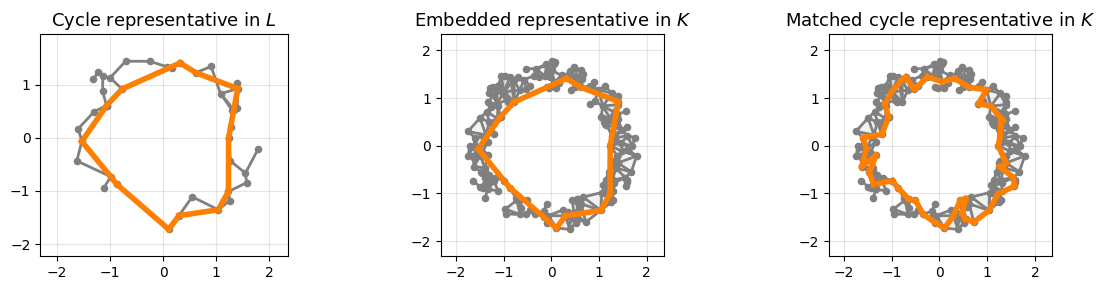

In [7]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
filt_val = 1.3
ibfm.plot_Vietoris_Rips(Z[indices_subset], filt_val, ax[0], labels=False, fontsize=15, color="gray")
ibfm.plot_Vietoris_Rips(Z, filt_val, ax[1], labels=False, fontsize=15, color="gray")
ibfm.plot_Vietoris_Rips(Z, filt_val, ax[2], labels=False, fontsize=15, color="gray")
ax[0].set_xlim(ax[1].get_xlim())
# Depict the important cycle from the domain
color = mpl.colormaps["Set1"](0.5)
ibfm.plot_cycle(Z, matching_data["S_reps_1"][1], ax[0], color=color, linewidth=4)
# Depict image cycle 
ibfm.plot_cycle(Z, matching_data["S_reps_im_1"][1], ax[1], color=color, linewidth=4)
# Depict matched cycle
block_function_1 = matching_data["induced_matching_1"]
ibfm.plot_cycle(Z, matching_data["X_reps_1"][block_function_1[1]], ax[2], color=color, linewidth=4)

# Set titles
ax[0].set_title("Cycle representative in $L$", fontsize=13)
ax[1].set_title("Embedded representative in $K$", fontsize=13)
ax[2].set_title("Matched cycle representative in $K$", fontsize=13)

# Save figure
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "cycle_reps_matching_2_not_collapsed.png"))

# Table comparing edge collapse iterations and number of point samples 

In [8]:
from tqdm import tqdm 

RandGen = np.random.default_rng(5)
num_collapse_iterations = 2
num_points_list = list(range(100,200, 20))
num_iterations_points = 5
times_array = np.zeros((num_collapse_iterations+1, len(num_points_list), num_iterations_points))
for k in range(num_collapse_iterations+1):
    print(f"Collapsing {k} times")
    for i, num_points in tqdm(enumerate(num_points_list), total=len(num_points_list)):
        for j in range(num_iterations_points):
            Z = ibfm.sampled_circle(1.2,1.8,num_points, RandGen)
            indices_subset = list(range(int(num_points*0.5)))
            before = datetime.now()
            matching_data = ibfm.get_IBloFunMatch_subset(None, Z, indices_subset, output_dir, num_it=k, max_rad=-1, points=True)
            after = datetime.now()
            times_array[k,i,j] = (after-before).total_seconds()
        # end for
    # end for
# end for

Collapsing 0 times


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:04<00:00, 60.98s/it]


Collapsing 1 times


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.74it/s]


Collapsing 2 times


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.00it/s]


[ 2.8177476  5.5496362  9.874483  17.201422  25.5310646]
[0.0511988 0.0746264 0.1117818 0.1461396 0.1901476]
[0.043176  0.0639664 0.0932032 0.128118  0.1697868]


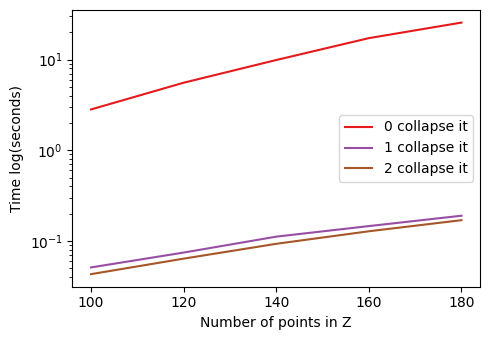

In [9]:
means_times = times_array.mean(axis=2)
fig, ax = plt.subplots(figsize=(5,3.5))
colormap = mpl.colormaps["Set1"]
for i in range(num_collapse_iterations+1):
    print(means_times[i])
    ax.semilogy(list(range(means_times.shape[1])), means_times[i], color=colormap(i/(num_collapse_iterations+1)), label=f"{i} collapse it")

ax.legend()
ax.set(
    xlabel = "Number of points in Z",
    ylabel="Time log(seconds)", 
    xticks = list(range(len(num_points_list))), 
    xticklabels=num_points_list
)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "computationvisualisation.png"))